In [1]:
from importlib import reload
import src.UNET
reload(src.UNET)

import numpy as np
from src.UNET import UNET
from src.preprocessing import data_generator
from keras.models import load_model, Model

import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
PATCH_SIZE = 400

x_train, x_test, y_train, y_test = data_generator(PATCH_SIZE, num_images = 15, rotation_degs=[])

#datagen = ImageDataGenerator(
 #   featurewise_std_normalization = True 
#)

#datagen.fit(x_train)

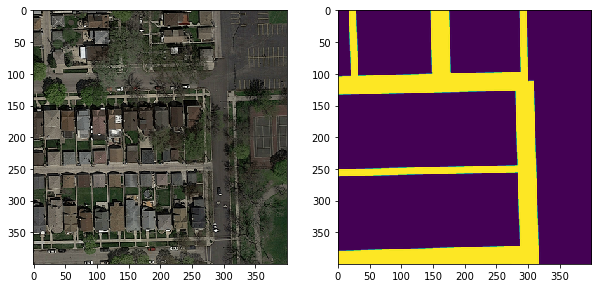

In [3]:
fig = plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
plt.imshow(x_train[0])
plt.subplot(1,2,2)
plt.imshow(y_train[0].reshape(400, 400))


In [4]:
from skimage.transform import resize
NEW_RES = 64

def lower_res(x, channels):
    return [resize(x[i], (64, 64, channels) ) for i in range(len(x))]

x_tr = lower_res(x_train, 3)
x_te = lower_res(x_test, 3)
y_tr = lower_res(y_train, 1)
y_te = lower_res(y_test, 1)

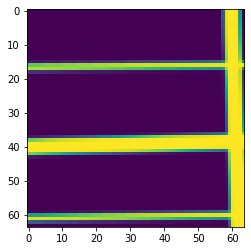

In [60]:
plt.imshow(y_tr[0].reshape(NEW_RES, NEW_RES))

In [9]:
from keras.utils import to_categorical
y_tr = np.copy(y_train)
y_tr[y_tr >= 0.5] = 1
y_tr[y_tr < 0.5] = 0

array([0., 1.], dtype=float32)

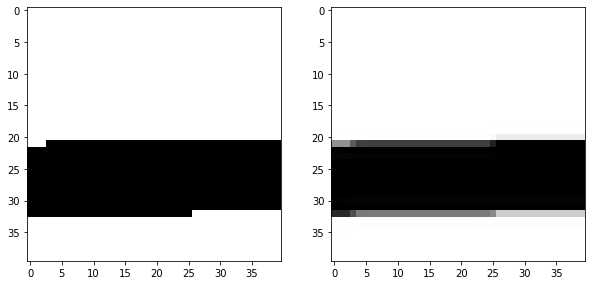

In [12]:
n = 3
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(y_tr[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,2,2)
plt.imshow(y_train[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
np.unique(y_tr)

In [39]:
y_t = to_categorical(y_tr)

In [5]:
unet = UNET(image_shape = (PATCH_SIZE, PATCH_SIZE, 3), layers = 2)
unet.build_model()
model = unet.get_model()

Building model with 2 layers
Filtersizes being used in UNET: [64, 128, 256]
Bulding contraction layers at layer: 1 and filtersize: 64
Bulding contraction layers at layer: 2 and filtersize: 128
Building bottleneck at layer: 2 and filtersize: 256
Building expansion at layer: 2 and filtersize: 128
Building expansion at layer: 1 and filtersize: 64
Compiling model...
Model compiled.


In [21]:
model.load_weights('./models/weights05_15.28.h5')

In [22]:
model.evaluate(x_test, y_t)

NameError: name 'y_t' is not defined

In [36]:
n = 1
pred = model.predict(x_test[n:n+1, :, :, :])
#pred[pred >= 0.5] = 1
#pred[pred < 0.5] = 0
#pred = np.argmax(pred, axis = 3)
pred = np.argmax(pred, axis = 3)
#pred

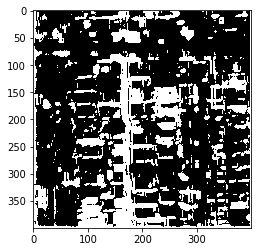

In [13]:
plt.imshow(pred.reshape(400, 400), cmap = 'Greys')

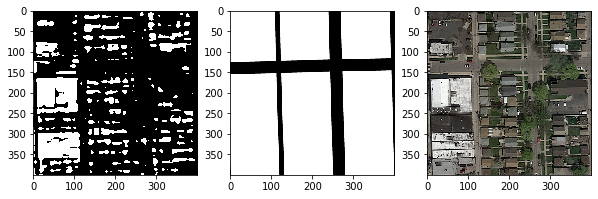

In [40]:
f = plt.figure(figsize = (10, 15))
plt.subplot(1,3,1)
plt.imshow(pred.reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,3,2)
plt.imshow(y_test[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,3,3)
plt.imshow(x_test[n].reshape(PATCH_SIZE, PATCH_SIZE, 3))